# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [2]:
X_, Y_, X_test, Y_test = (
    pd.read_csv('./csv/train/X_train.csv', index_col=[0, 1]), 
    pd.read_csv('./input/train/y_train.txt', sep=r'\s+', header=None, names=['activity']), 
    pd.read_csv('./csv/test/X_test.csv', index_col=[0, 1]), 
    pd.read_csv('./input/test/y_test.txt', sep=r'\s+', header=None, names=['activity'])
)

In [3]:
display(X_.head(), X_.shape[0])
display(X_test.head(), X_test.shape[0])
display(Y_.head(), Y_.shape[0])
display(Y_test.head(), Y_test.shape[0])

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
subject                                                              
1       0           0.288585          -0.020294          -0.132905   
        1           0.278419          -0.016411          -0.123520   
        2           0.279653          -0.019467          -0.113462   
        3           0.279174          -0.026201          -0.123283   
        4           0.276629          -0.016570          -0.115362   

           tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
subject                                                           
1       0         -0.995279         -0.983111         -0.913526   
        1         -0.998245         -0.975300         -0.960322   
        2         -0.995380         -0.967187         -0.978944   
        3         -0.996091         -0.983403         -0.990675   
        4         -0.998139         -0.980817         -0.990482   

           tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
subject                                                           
1       0         -0.995112         -0.983185         -0.923527   
        1         -0.998807         -0.974914         -0.957686   
        2         -0.996520         -0.963668         -0.977469   
        3         -0.997099         -0.982750         -0.989302   
        4         -0.998321         -0.979672         -0.990441   

           tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
subject                      ...                                    
1       0         -0.934724  ...                        -0.074323   
        1         -0.943068  ...                         0.158075   
        2         -0.938692  ...                         0.414503   
        3         -0.938692  ...                         0.404573   
        4         -0.942469  ...                         0.087753   

           fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
subject                                                                       
1       0                        -0.298676                        -0.710304   
        1                        -0.595051                        -0.861499   
        2                        -0.390748                        -0.760104   
        3                        -0.117290                        -0.482845   
        4                        -0.351471                        -0.699205   

           angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
subject                                                                        
1       0                    -0.112754                              0.030400   
        1                     0.053477                             -0.007435   
        2                    -0.118559                              0.177899   
        3                    -0.036788                             -0.012892   
        4                     0.123320                              0.122542   

           angle(tBodyGyroMean,gravityMean)  \
subject                                       
1       0                         -0.464761   
        1                         -0.732626   
        2                          0.100699   
        3                          0.640011   
        4                          0.693578   

           angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
subject                                                                 
1       0                             -0.018446             -0.841247   
        1                              0.703511             -0.844788   
        2                              0.808529             -0.848933   
        3                             -0.485366             -0.848649   
        4                             -0.615971             -0.847865   

           angle(Y,gravityMean)  angle(Z,gravityMean)  
subject                                                
1       0              0.17

7352

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
subject                                                              
2       0           0.257178          -0.023285          -0.014654   
        1           0.286027          -0.013163          -0.119083   
        2           0.275485          -0.026050          -0.118152   
        3           0.270298          -0.032614          -0.117520   
        4           0.274833          -0.027848          -0.129527   

           tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
subject                                                           
2       0         -0.938404         -0.920091         -0.667683   
        1         -0.975415         -0.967458         -0.944958   
        2         -0.993819         -0.969926         -0.962748   
        3         -0.994743         -0.973268         -0.967091   
        4         -0.993852         -0.967445         -0.978295   

           tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
subject                                                           
2       0         -0.952501         -0.925249         -0.674302   
        1         -0.986799         -0.968401         -0.945823   
        2         -0.994403         -0.970735         -0.963483   
        3         -0.995274         -0.974471         -0.968897   
        4         -0.994111         -0.965953         -0.977346   

           tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
subject                      ...                                    
2       0         -0.894088  ...                         0.071645   
        1         -0.894088  ...                        -0.401189   
        2         -0.939260  ...                         0.062891   
        3         -0.938610  ...                         0.116695   
        4         -0.938610  ...                        -0.121711   

           fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
subject                                                                       
2       0                        -0.330370                        -0.705974   
        1                        -0.121845                        -0.594944   
        2                        -0.190422                        -0.640736   
        3                        -0.344418                        -0.736124   
        4                        -0.534685                        -0.846595   

           angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
subject                                                                        
2       0                     0.006462                              0.162920   
        1                    -0.083495                              0.017500   
        2                    -0.034956                              0.202302   
        3                    -0.017067                              0.154438   
        4                    -0.002223                             -0.040046   

           angle(tBodyGyroMean,gravityMean)  \
subject                                       
2       0                         -0.825886   
        1                         -0.434375   
        2                          0.064103   
        3                          0.340134   
        4                          0.736715   

           angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
subject                                                                 
2       0                              0.271151             -0.720009   
        1                              0.920593             -0.698091   
        2                              0.145068             -0.702771   
        3                              0.296407             -0.698954   
        4                             -0.118545             -0.692245   

           angle(Y,gravityMean)  angle(Z,gravityMean)  
subject                                                
2       0              0.27

2947

,activity
0,5
1,5
2,5
3,5
4,5


7352

,activity
0,5
1,5
2,5
3,5
4,5


2947

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X_, Y_, test_size=.25, random_state=4)

In [5]:
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

5514
1838
2947


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [6]:
clf = DecisionTreeClassifier(random_state=4, max_depth=4)
clf.fit(X_train, Y_train)

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

top_3_features = feature_importances.head(3)
print("\nTop 3 Most Important Features:")
print(top_3_features)

Feature Importances:
                                  feature  importance
52                    tGravityAcc-min()-X    0.288802
389       fBodyAccJerk-bandsEnergy()-1,16    0.253244
41                   tGravityAcc-mean()-Y    0.161054
508                  fBodyAccMag-energy()    0.140735
69              tGravityAcc-arCoeff()-Y,1    0.119133
..                                    ...         ...
556      angle(tBodyGyroMean,gravityMean)    0.000000
557  angle(tBodyGyroJerkMean,gravityMean)    0.000000
558                  angle(X,gravityMean)    0.000000
559                  angle(Y,gravityMean)    0.000000
16                    tBodyAcc-energy()-X    0.000000

[561 rows x 2 columns]

Top 3 Most Important Features:
                             feature  importance
52               tGravityAcc-min()-X    0.288802
389  fBodyAccJerk-bandsEnergy()-1,16    0.253244
41              tGravityAcc-mean()-Y    0.161054


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [14]:
top_features = top_3_features['feature'].tolist()

X_train_top = X_train[top_features]
X_val_top   = X_val[top_features]
X_test_top  = X_test[top_features]

base_clf = DecisionTreeClassifier(random_state=4, max_depth=4)
path = base_clf.cost_complexity_pruning_path(X_train_top, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=4, ccp_alpha=ccp_alpha, random_state=4).fit(X_train_top, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train_top, Y_train) for clf in clfs]
valid_scores = [clf.score(X_val_top, Y_val) for clf in clfs]

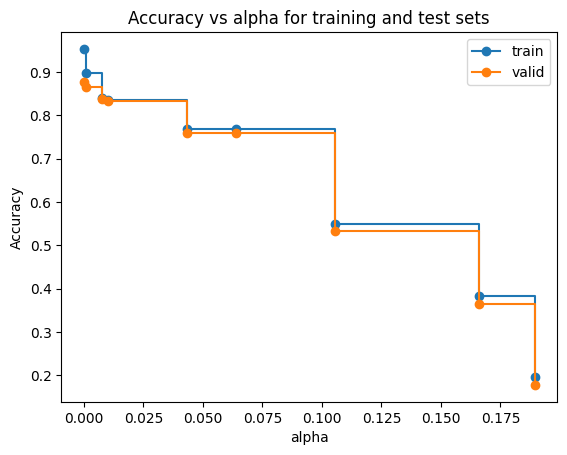

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 87.81


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
best_tree_index = np.argmax(test_scores)

best_ccp_alpha = ccp_alphas[best_tree_index]
best_accuracy = test_scores[best_tree_index]

print(f"The best ccp_alpha is: {best_ccp_alpha}")
print(f"The best accuracy on the test set is: {best_accuracy}")

The best ccp_alpha is: 0.010299758522512463
The best accuracy on the test set is: 0.7200542925008483


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 68.04


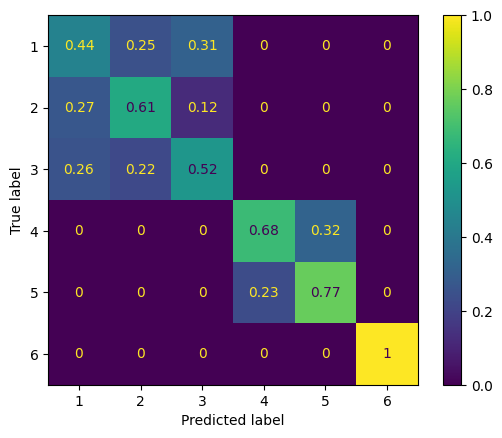

In [32]:
acuracia_teste = melhor_arvore.score(X_test_top, Y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
confunsion_matrix_display = ConfusionMatrixDisplay.from_estimator(
    melhor_arvore, X_test_top, Y_test, normalize='true'
)